In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
file_path = '/content/pca_result_95variance_11components.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.270624  0.006484  0.931207  0.194497 -0.548759  0.164637 -1.213615   
1  3.555514 -0.304125  0.553428  0.477325 -0.244402 -0.612696 -0.606465   
2  3.053840  0.868990  0.951313  1.138860 -0.126610  0.597600 -2.242476   
3  3.536385 -0.631844  0.272864  0.404124 -0.457440 -0.989644  0.099945   
4  4.052061 -0.027087  1.362121 -0.401166 -0.727371  0.015877 -0.785044   

        PC8       PC9      PC10      PC11  LABEL  
0 -0.407367 -0.329040  0.088107 -0.600684      1  
1  0.037900 -0.070477 -0.151906  0.293247      1  
2 -0.033443 -0.434816  0.085929  0.200889      1  
3 -0.032871 -0.198402 -0.140390  0.452599      1  
4 -1.320280 -0.249229  0.179810 -1.045662      1  


In [4]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [6]:
# Step 4: Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Dropping the label column
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

Features and labels separated successfully.


In [7]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (325, 11)
Testing set size: (82, 11)


In [8]:
# Step 6: Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)  # Adjust max_iter for convergence
print("Initialized Logistic Regression model.")

Initialized Logistic Regression model.


In [9]:
# Step 7: Train the Logistic Regression model
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [10]:
# Step 8: Make predictions on the test set
y_pred = log_reg.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [11]:
# Step 9: Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}")


Logistic Regression Model Accuracy: 0.84


In [12]:
# Step 10: Display the classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89         5
           4       1.00      0.88      0.93         8
           5       0.60      0.75      0.67         4
           6       0.80      1.00      0.89         4
           7       0.88      1.00      0.93         7
           8       0.50      0.50      0.50         4
           9       0.80      1.00      0.89         4
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       0.80      0.80      0.80         5
          13       1.00      0.75      0.86         4
          14       1.00      0.75      0.86         4
          15       1.00      0.60      0.75         5
          16       0.50      1.00      0.67         2
          17       1.00      0.40

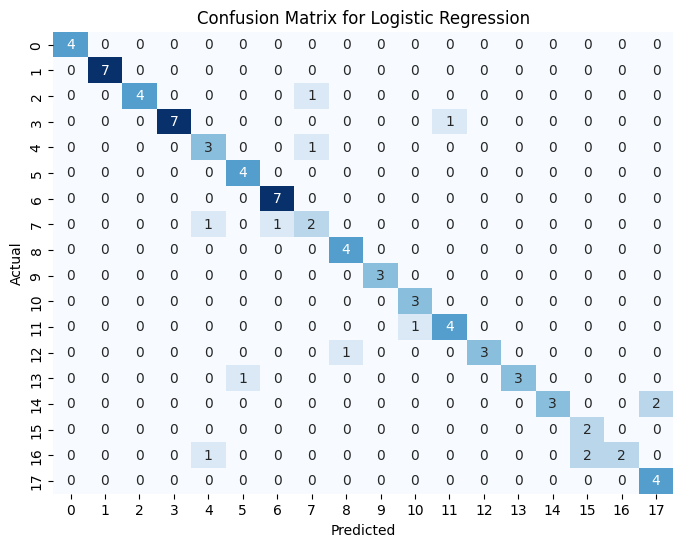

In [13]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

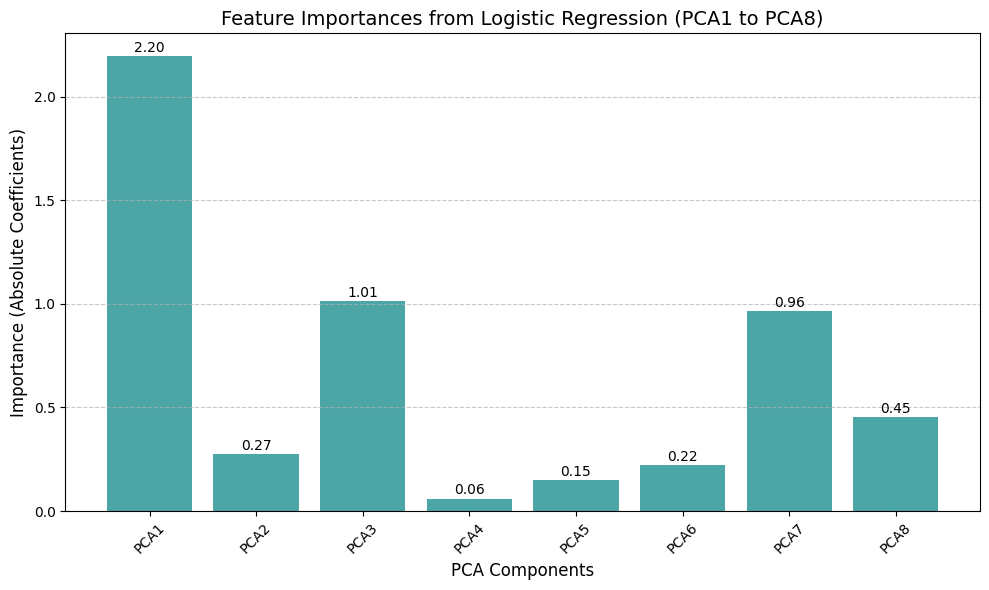

In [15]:
# Step 12: Plot feature importances for PCA components
# Extract coefficients (absolute values) from the trained logistic regression model
coefficients = np.abs(log_reg.coef_[0])  # For binary classification, only one set of coefficients

# Select the first 8 PCA components (assuming the dataset has columns PCA1, PCA2, ..., PCA8)
pca_columns = [f"PCA{i+1}" for i in range(8)]  # Adjust as per your dataset
feature_importances = coefficients[:8]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(pca_columns, feature_importances, color='teal', alpha=0.7)
plt.title("Feature Importances from Logistic Regression (PCA1 to PCA8)", fontsize=14)
plt.xlabel("PCA Components", fontsize=12)
plt.ylabel("Importance (Absolute Coefficients)", fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()